In [1]:
import pandas as pd

csv = 'driving_log.csv'
data = pd.read_csv(csv)

In [2]:
len(data)

8036

In [3]:
data.head()

,center,left,right,steering,throttle,brake,speed
0,IMG/center_2016_12_01_13_30_48_287.jpg,IMG/left_2016_12_01_13_30_48_287.jpg,IMG/right_2016_12_01_13_30_48_287.jpg,0.0,0.0,0.0,22.148290
1,IMG/center_2016_12_01_13_30_48_404.jpg,IMG/left_2016_12_01_13_30_48_404.jpg,IMG/right_2016_12_01_13_30_48_404.jpg,0.0,0.0,0.0,21.879630
2,IMG/center_2016_12_01_13_31_12_937.jpg,IMG/left_2016_12_01_13_31_12_937.jpg,IMG/right_2016_12_01_13_31_12_937.jpg,0.0,0.0,0.0,1.453011
3,IMG/center_2016_12_01_13_31_13_037.jpg,IMG/left_2016_12_01_13_31_13_037.jpg,IMG/right_2016_12_01_13_31_13_037.jpg,0.0,0.0,0.0,1.438419
4,IMG/center_2016_12_01_13_31_13_177.jpg,IMG/left_2016_12_01_13_31_13_177.jpg,IMG/right_2016_12_01_13_31_13_177.jpg,0.0,0.0,0.0,1.418236


In [4]:
Y = data['steering']
Y.plot.hist(bins=100, alpha=0.5)

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

STEER = 0.25
CROP = range(40, 140)
RESIZE = (200, 66)
AFFINE = [10, 20, 30, 40, 50]

## 三个视角

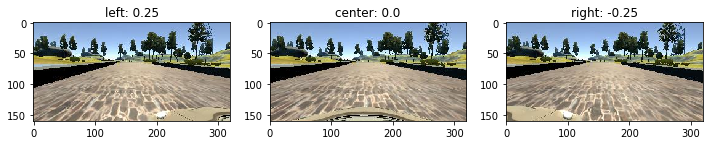

In [6]:
left_image = cv2.imread(data.iloc[0]['left'].strip())
left_image = cv2.cvtColor(left_image, cv2.COLOR_BGR2RGB)
left_steer = data.iloc[0]['steering'] + STEER

center_image = cv2.imread(data.iloc[0]['center'].strip())
center_image = cv2.cvtColor(center_image, cv2.COLOR_BGR2RGB)
center_steer = data.iloc[0]['steering']

right_image = cv2.imread(data.iloc[0]['right'].strip())
right_image = cv2.cvtColor(right_image, cv2.COLOR_BGR2RGB)
right_steer = data.iloc[0]['steering'] - STEER

plt.figure(figsize = (12, 4))

plt.subplot(1, 3, 1)
plt.imshow(left_image)
plt.title('left: ' + str(left_steer))

plt.subplot(1, 3, 2)
plt.imshow(center_image)
plt.title('center: ' + str(center_steer))

plt.subplot(1, 3, 3)
plt.imshow(right_image)
plt.title('right: ' + str(right_steer))

## 管道测试

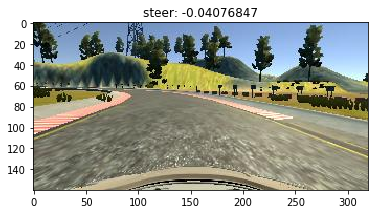

In [7]:
index = np.random.randint(0, len(data))

image = cv2.imread(data.iloc[index]['center'].strip())
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
steer = data.iloc[index]['steering']

plt.imshow(image)
plt.title('steer: ' + str(steer))

## 截取

In [8]:
def crop(image):
    return image[CROP]

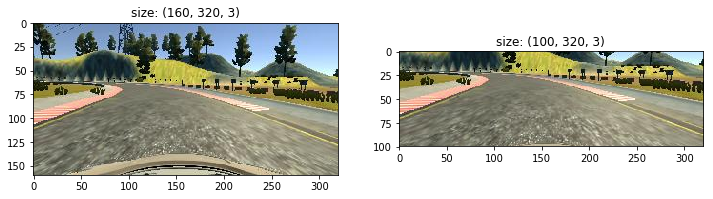

In [9]:
plt.figure(figsize = (12, 4))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('size: ' + str(image.shape))

plt.subplot(1, 2, 2)
crop_image = crop(image)
plt.imshow(crop_image)
plt.title('size: ' + str(crop_image.shape))

## 放缩

In [10]:
def resize(image):
    return cv2.resize(image, RESIZE)

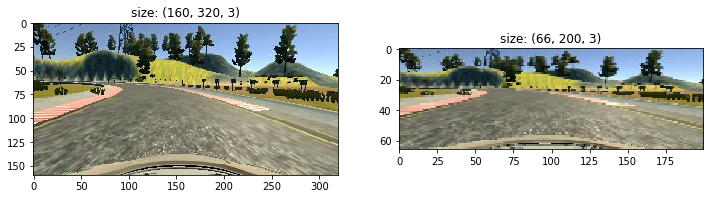

In [11]:
plt.figure(figsize = (12, 8))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('size: ' + str(image.shape))

plt.subplot(1, 2, 2)
resize_image = resize(image)
plt.imshow(resize_image)
plt.title('size: ' + str(resize_image.shape))

## 仿射

In [12]:
def affine(image, steer, shear=0):
    """
    Source: https://medium.com/@ksakmann/behavioral-cloning-make-a-car-drive-like-yourself-dc6021152713#.7k8vfppvk
    """
    rows, cols, ch = image.shape
    random_point = [cols / 2 + shear, rows / 2]
    pts1 = np.float32([[0, rows], [cols, rows], [cols / 2, rows / 2]])
    pts2 = np.float32([[0, rows], [cols, rows], random_point])
    dsteer = shear / (rows / 2) * 360 / (2 * np.pi * 25.0) / 6.0
    M = cv2.getAffineTransform(pts1, pts2)
    image = cv2.warpAffine(image, M, (cols, rows), borderMode=1)
    steer += dsteer

    return image, steer

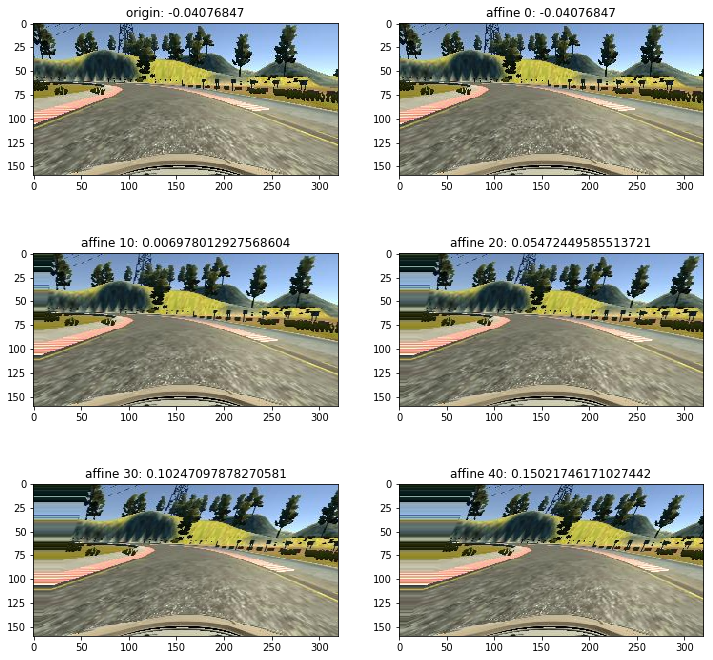

In [13]:
plt.figure(figsize = (12, 12))

plt.subplot(3, 2, 1)
plt.imshow(image)
plt.title('origin: ' + str(steer))

plt.subplot(3, 2, 2)
affine_image, affine_steer = affine(image, steer, 0)
plt.imshow(affine_image)
plt.title('affine 0: ' + str(affine_steer))

plt.subplot(3, 2, 3)
affine_image, affine_steer = affine(image, steer, 10)
plt.imshow(affine_image)
plt.title('affine 10: ' + str(affine_steer))

plt.subplot(3, 2, 4)
affine_image, affine_steer = affine(image, steer, 20)
plt.imshow(affine_image)
plt.title('affine 20: ' + str(affine_steer))

plt.subplot(3, 2, 5)
affine_image, affine_steer = affine(image, steer, 30)
plt.imshow(affine_image)
plt.title('affine 30: ' + str(affine_steer))

plt.subplot(3, 2, 6)
affine_image, affine_steer = affine(image, steer, 40)
plt.imshow(affine_image)
plt.title('affine 40: ' + str(affine_steer))

## 对称

In [14]:
def flip(image, steer):
    return cv2.flip(image, 1), steer * -1

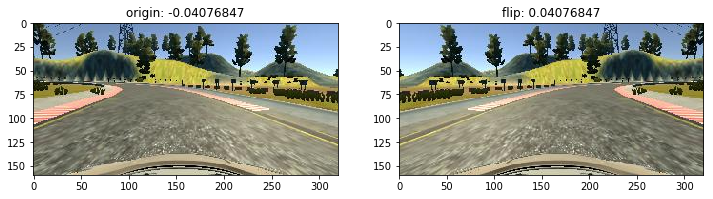

In [15]:
plt.figure(figsize = (12, 4))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('origin: ' + str(steer))

plt.subplot(1, 2, 2)
flip_image, flip_steer = flip(image, steer)
plt.imshow(flip_image)
plt.title('flip: ' + str(flip_steer))

## pipeline
一张图生成10张图
1. 截取 crop range(40, 140)
2. 放缩 resize (66, 200)
3. 仿射 affine [0, 10, 20, 30, 40]
4. 对称 flip 1 -1

In [16]:
def getview(index):
    left_image = data.iloc[index]['left'].strip()
    left_steer = data.iloc[index]['steering'] + STEER

    center_image = data.iloc[index]['center'].strip()
    center_steer = data.iloc[index]['steering']

    right_image = data.iloc[index]['right'].strip()
    right_steer = data.iloc[index]['steering'] - STEER
    
    images = [left_image, center_image, right_image]
    steers = [left_steer, center_steer, right_steer]
    
    return images, steers

In [17]:
def pipeline(image, steer):
    images = []
    steers = []
    
    image = crop(image)
    image = resize(image)
    
    for num in AFFINE:
        image, steer = affine(image, steer, num)
        images.append(image)
        steers.append(steer)
        
        image, steer = flip(image, steer)
        images.append(image)
        steers.append(steer)
        
    return images, steers

In [18]:
X = []
Y = []

for i in range(len(data)):
    images, steers = getview(i)
    for image, steer in zip(images, steers):
        raw_image = cv2.imread(image)
        raw_image = cv2.cvtColor(raw_image, cv2.COLOR_BGR2RGB)
        
        gen_images, gen_steers = pipeline(raw_image, steer)
        
        X.extend(gen_images)
        Y.extend(gen_steers)

In [19]:
X = np.array(X)
Y = np.array(Y)

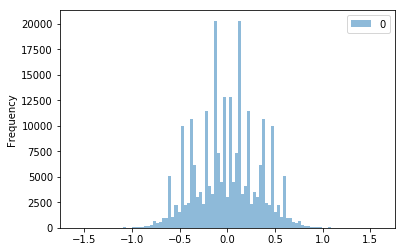

In [20]:
pd.DataFrame(Y).plot.hist(bins=101,alpha=0.5)

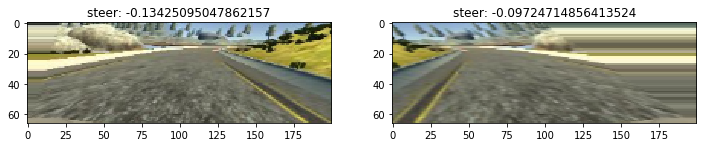

In [21]:
plt.figure(figsize = (12, 8))

plt.subplot(1, 2, 1)
plt.imshow(X[-10])
plt.title('steer: ' + str(Y[-10]))

plt.subplot(1, 2, 2)
plt.imshow(X[-1])
plt.title('steer: ' + str(Y[-1]))

## 训练

In [27]:
from keras.models import Model, Sequential
from keras.layers import Activation, BatchNormalization
from keras.layers import Input, Flatten, Dense, Dropout, Lambda
from keras.layers import Conv2D, MaxPooling2D

In [23]:
HEIGHT = 66
WEIGHT = 200

In [28]:
input = Input(shape=(HEIGHT, WEIGHT, 3))

# 标准化
x = Lambda(lambda x: x / 255.0-0.5, )(input)

# model.add(Conv2D(24, (5, 5), strides=(2,2), padding='valid'))
# model.add(Activation('relu'))
# model.add(Dropout(rate=0.2))

x = Conv2D(24, (5, 5), strides=(2,2), activation='relu')(x)
x = Dropout(rate=0.2)(x)

x = Conv2D(36, (5, 5), strides=(2,2), activation='relu')(x)
x = Dropout(rate=0.2)(x)

x = Conv2D(48, (5, 5), strides=(2,2), activation='relu')(x)
x = Dropout(rate=0.2)(x)

x = Conv2D(64, (3, 3), strides=(1,1), activation='relu')(x)
x = Activation('relu')(x)
x = Dropout(rate=0.2)(x)

x = Conv2D(64, (3, 3), strides=(1,1), activation='relu')(x)
x = Dropout(rate=0.2)(x)

x = Flatten()(x)

x = Dense(100, activation='relu')(x)
x = Dropout(rate=0.5)(x)

x = Dense(50, activation='relu')(x)
x = Dropout(rate=0.5)(x)

x = Dense(10, activation='relu')(x)

output = Dense(1)(x)

model = Model(inputs=input, outputs=output)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 66, 200, 3)        0         
_________________________________________________________________
lambda_4 (Lambda)            (None, 66, 200, 3)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 31, 98, 24)        1824      
_________________________________________________________________
dropout_22 (Dropout)         (None, 31, 98, 24)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 14, 47, 36)        21636     
_________________________________________________________________
dropout_23 (Dropout)         (None, 14, 47, 36)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 5, 22, 48)         43248     
__________

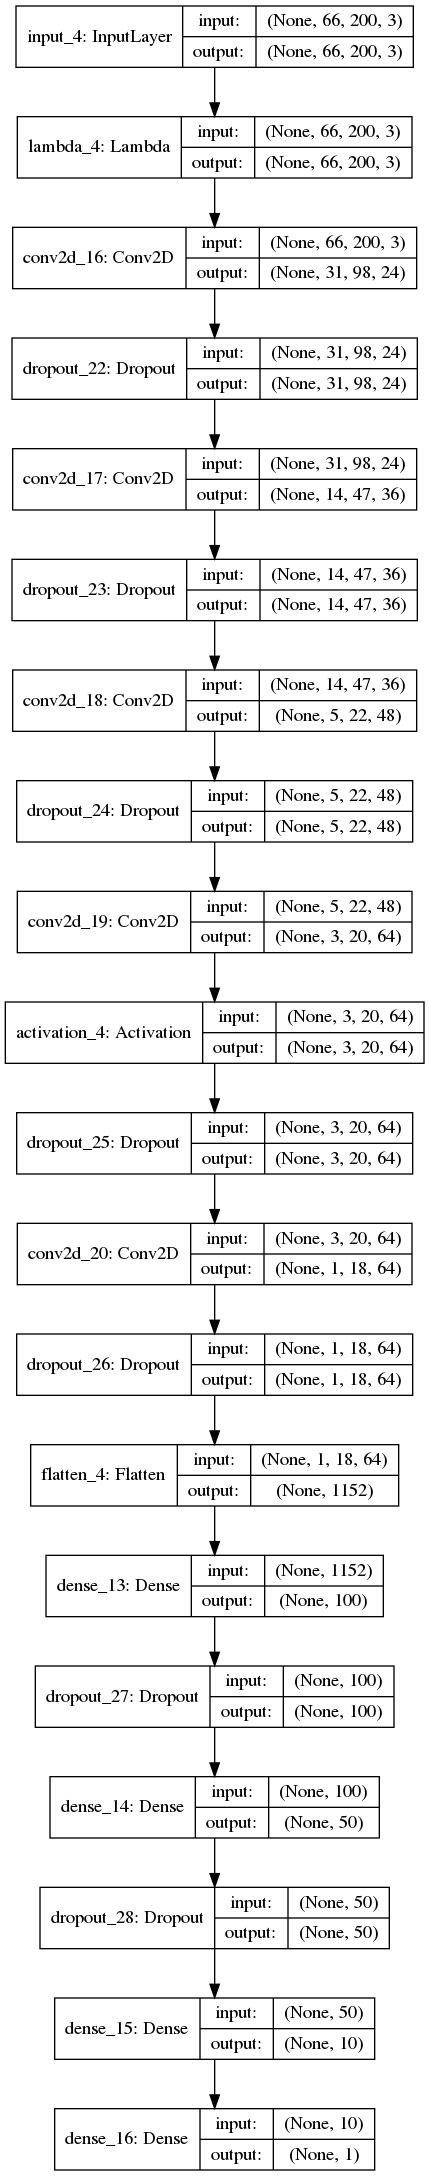

In [29]:
# 模型可视化 https://keras-cn.readthedocs.io/en/latest/other/visualization/
from keras.utils import plot_model
from IPython import display

# pip install pydot
# pip install pydot-ng
# sudo apt-get install graphviz
plot_model(model, to_file='model.png', show_shapes=True)
display.Image('model.png')

In [30]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard

EPOCHS = 10
BATCH_SIZE = 64
VALIDATION_SPLIT = 0.3 # 30% 验证集

early_stopping = EarlyStopping(monitor='val_loss', patience=10)
model_path = 'model/model_best.h5'
model_checkpoint = ModelCheckpoint(model_path, save_best_only=True, save_weights_only=True)
tensorboard = TensorBoard('log/tflog', write_graph=True, write_images=True)

model.compile(optimizer='adam', loss='mse')

In [31]:
model.fit(X, Y, epochs=EPOCHS, batch_size=BATCH_SIZE,
          validation_split=VALIDATION_SPLIT, shuffle=True,
          callbacks=[early_stopping, model_checkpoint, tensorboard])

model.save('model/model_last.h5')

Instructions for updating:
Use tf.cast instead.
Train on 168756 samples, validate on 72324 samples
Epoch 1/10
168756/168756 [==============================] - 74s 440us/step - loss: 0.0278 - val_loss: 0.0270
Epoch 2/10
168756/168756 [==============================] - 65s 385us/step - loss: 0.0209 - val_loss: 0.0255
Epoch 3/10
168756/168756 [==============================] - 64s 381us/step - loss: 0.0193 - val_loss: 0.0261
Epoch 4/10
168756/168756 [==============================] - 62s 367us/step - loss: 0.0185 - val_loss: 0.0262
Epoch 5/10
168756/168756 [==============================] - 61s 363us/step - loss: 0.0179 - val_loss: 0.0274
Epoch 6/10
168756/168756 [==============================] - 61s 361us/step - loss: 0.0174 - val_loss: 0.0273
Epoch 7/10
168756/168756 [==============================] - 61s 363us/step - loss: 0.0171 - val_loss: 0.0274
Epoch 8/10
168756/168756 [==============================] - 61s 364us/step - loss: 0.0168 - val_loss: 0.0262
Epoch 9/10
168756/168756 [===